## İçerik
1. [120 Yıllık Olimpiyat Tarihi Veri Seti](#1)
    * Veri Hakkında Bilgi
1. [Verinin Temizlenmesi](#2)
    * Sütun İsimlerinin Düzenlenmesi
    * Yararsız Verinin Çıkarılması ve Düzenlenmesi
    * Kayıp Veri Sorunu 
1. [Tek Değişkenli Veri Analizi](#3)
    * Sayısal Değişkenler
    * Kategorik Değişkenler
1. [İki Değişkenli Veri Analizi](#4)
1. [Çok Değişkenli Veri Analizi](#5)
    * groupby - melting/pivoting vb.
1. [Anomali Tespiti](#6)
1. [Zaman Serilerinde Veri Analizi](#7)

<a id='1'></a>
## 120 Yıllık Olimpiyat Tarihi Veri Seti
* Olimpiyat Oyunları, Yaz ve Kış Olimpiyat Oyunları olmak üzere iki ayrı kategoride, dört yılda bir düzenlenen uluslararası çok sporlu etkinlik. 200'ün üzerinde ülkeyi temsil eden sporcuların katıldığı etkinlikler, dünyanın en kapsamlı spor etkinliği konumundadır.

* Temelleri MÖ 8. yüzyılda Olimpiya'da gerçekleştirilen antik oyunlara dayansa da modern oyunların ilki 1896 yılında, Pierre de Coubertin'in Uluslararası Olimpiyat Komitesini (kısaca IOC) kurması sonrasında gerçekleştirildi. 1924 yılında, kış sporları etkinliklerinin yer aldığı Kış Olimpiyatları düzenlenmeye başlandı. I. Dünya Savaşı sebebiyle 1916'daki oyunlar, II. Dünya Savaşı sebebiyle ise 1940 ve 1944'teki oyunlar gerçekleştirilemedi. Her iki etkinlik son olarak 1992'de aynı yıl içerisinde gerçekleştirildi ve 1994'te düzenlenen Kış Olimpiyatları ile birlikte iki etkinlik arasında ikişer yıllık fark oluştu.

* Olimpiyat Oyunları kapsamında, toplamda 13.000'in üzerinde sporcu 400'den fazla kategoride mücadele etmektedir. Gerçekleştirilen mücadeleler sonunda, belli bir kategoride en iyi sırayı elde eden sporcu altın madalya ile ödüllendirilirken, ikinci ve üçüncü sıradaki sporcular sırasıyla gümüş ve bronz madalyanın sahibi olur. (Vikipedi)
* 120 Yıllık Olimpiyat Tarihi Veri Seti, Atina 1896'dan Rio 2016'ya kadar tüm oyunlar da dahil olmak üzere modern Olimpiyat Oyunlarına ilişkin tarihsel bir veri kümesidir.
* Veri seti içerisinde bulunan sütunların isimleri ve açıklamaları
    1. ID - Her sporcu için benzersiz numara
    1. Name - Sporcunun ismi
    1. Gender - Cinsiyet: M(Erkek) - F(Kadın)
    1. Age - Yaş
    1. Height - Boy (santimetre)
    1. Weight - Ağırlık (Kilogram)
    1. Team - Takım ismi
    1. NOC - Ulusal Olimpiyat Komitesi 3 harfli kod
    1. Games - Yıl ve sezon
    1. Year - Yıl
    1. Season - Sezon: Yaz ya da Kış
    1. City - Düzenlenen Şehir
    1. Sport - Spor
    1. Event - Etkinlik
    1. Medal - Madalya: Altın, Gümüş, Bronz ve Madalya Yok

In [1]:
# Kütüphaneleri import edelim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Pythonda uyarıları kapatır
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Veriyi içe aktar
veri = pd.read_csv("olimpiyatlar.csv")
veri.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Veri Hakkında Bilgi
* Bu bölümde veri içerisinde bulunan her bir sütun içerisinde kaç adet örnek var, bu verilerin veri tipleri nedir ve veri
tiplerinin tüm veri içerisinde dağılımı nedir gibi veriyi tanımak için gerekli temel soruları cevaplayacağız.

In [3]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


<a id='2'></a>
## Verinin Temizlenmesi
* Sütun İsimlerinin Düzenlenmesi
* Yararsız Verinin Çıkarılması ve Düzenlenmesi
* Kayıp Veri Sorunu 

### Sütun İsimlerinin Düzenlenmesi
* Bu bölümde veri içerisinde bulunan sütun isimlerini inceleyeceğiz ve bu isimleri Türkçeye çevireceğiz.

In [4]:
# Veri içerisinde bulunan sütunları listeyelim.
veri.columns

Index(['ID', 'Name', 'Gender', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
# Sütun isimlerinin değiştirilmesi
veri.rename(columns={'ID'    : 'id', 
                     'Name'  : 'isim', 
                     'Gender'   : 'cinsiyet', 
                     'Age'   : 'yas', 
                     'Height': 'boy', 
                     'Weight': 'kilo', 
                     'Team'  : 'takim', 
                     'NOC'   : 'uok', 
                     'Games' : 'oyunlar',
                     'Year'  : 'yil', 
                     'Season': 'sezon', 
                     'City'  : 'sehir',
                     'Sport' : 'spor',
                     'Event' : 'etkinlik',
                     'Medal' : 'madalya'}, inplace=True) # inplace = True dediğimiz zaman ismi değiştirilen veri otomatik olarak veri variable'a kaydedilir
veri.head(2)

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


### Yararsız Verinin Çıkarılması ve Düzenlenmesi
* id sütunu veri hakkında herhangi bir bilgi vermediği için çıkarılacaktır.
* oyunlar sütunu yıl ve sezon sütunlarının birleşimi olduğu için yararsız veri olarak kabul edilir ve çıkarılabilir.

In [6]:
# Drop metodu ile id ve oyunlar'ı çıkaralım
veri = veri.drop(["id", "oyunlar"], axis = 1) # axis = 1 sütunları çıkart demek
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Kayıp Veri Sorunu 
* Kayıp veri kavramı veri içerisinde bulunan örneğin herhangi bir sütununda bulunan değerin olmaması anlamına gelir. 
* Mesela, aşağıda bulunan veride ikinci index'te bulunan örneğin boy ve kilo sütunlarında NaN (Not a Number) yazmaktadır. Bu NaN yazısı örneğe ait boy ve kilo verisinin olmadığı ya da kayıp olduğu anlamına gelir.

In [7]:
veri.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


* Kayıp veri ile mücadele etmek için,
    1. Kayıp veriye ait örnekler veriden çıkarılabilir.
    1. Kayıp veriler asıl verinin dağılımını bozmayacak şekilde asıl verinin ortalama ya da medyan değerlerine göre doldurulabilir.
* Bu veri üzerinde çalışma yaparken, 
    1. Boy ve kilo sütununda bulunan kayıp veriyiyi etkinlik ortalamasına göre dolduracağız.
    1. Yaş sütununda bulunan kayıp veriyi veri setinin yaş ortalamasına göre dolduracağız.
    1. Madalya alamayan sporcuları veri setinden çıkaracağız.

### Boy ve Kilo Sütunu Kayıp Veri Doldurma
* Boy ve kilo sütununda bulunan kayıp veriyiyi etkinlik ortalamasına göre dolduracağız.

In [8]:
# 1. Boy ve kilo sütununda bulunan kayıp veriyiyi etkinlik ortalamasına göre dolduracağız.
essiz_etkinlik = pd.unique(veri.etkinlik)
print("Eşsiz etkinlik sayısı: {}".format(len(essiz_etkinlik)))
essiz_etkinlik[:10]

Eşsiz etkinlik sayısı: 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [9]:
# her bir etkinliği iteratif olarak dolaş
# etkinlik özelinde boy ve kilo ortalamalarını bul
# etkinlik özelinde boy ve kilo da kayıp olan değerlere ortalama boy ve kilo değerlerini eşitle

veri_gecici = veri.copy() # gerçek veriyi kaybetmemek için veri_gecici değişkeni belirle
boy_kilo_liste = ["boy", "kilo"]
for e in essiz_etkinlik: # etkinlik listesi içerisinde dolaş
    
    # etkinlik filtresi oluştur
    etkinlik_filtre = veri_gecici.etkinlik == e
    # veriyi etkinliğe göre filtrele
    veri_filtreli = veri_gecici[etkinlik_filtre]
    
    # boy ve kilo için etkinlik özelinde ortalama bul
    for s in boy_kilo_liste:
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama): # eğer etkinlik özelinde ortalama varsa
            veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
        else: # etkinlik özelinde ortalama yoksa tüm veri için ortalama bul
            tum_veri_ortalamasi = np.round(np.mean(veri[s]),2)
            veri_filtreli[s] = veri_filtreli[s].fillna(tum_veri_ortalamasi)
    # etkinlik özelinde kayıp değerleri doldurulmuş veriyi veri geçiciye eşitle            
    veri_gecici[etkinlik_filtre] = veri_filtreli

# kayıp değerleri giderilmiş geçici veriyi gerçek veri değişkenine eşitle
veri = veri_gecici.copy() 
veri.info() # boy ve kilo sütunlarında kayıp değer sayısına bak

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


### Yaş Sütunu Kayıp Veri Doldurma
* Yaş sütununda bulunan kayıp veriyi veri setinin yaş ortalamasına göre dolduracağız.

In [10]:
# 2. Yaş sütununda bulunan kayıp veriyi veri setinin yaş ortalamasına göre dolduracağız.
# yas değişkeni tanımlı olmayan örnekleri bul, 
# tilda işareti ile tersini al
# yaş değişkeni tanımlı olan örnekleri bulmak için filtre oluştur
yas_ortalamasi = np.round(np.mean(veri.yas),2)
print("Yaş ortlaması: {}".format(yas_ortalamasi))
veri["yas"] = veri["yas"].fillna(yas_ortalamasi)
veri.info()

Yaş ortlaması: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


### Madalya Alamayan Sporcuları Veri Setinden Çıkar
* Madalya alamayan sporcuları veri setinden çıkaracağız.

In [11]:
# 3. Madalya alamayan sporcuları veri setinden çıkaracağız.
# toplamda 231333 tane örnek için madalya değişkeni tanımlı değil
madalya_degiskeni = veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

231333

In [12]:
# madalya değişkeni tanımlı olmayan örnekleri bul, (NaN) 
# tilda işareti ile tersini al
# madalya değişkeni tanımlı olan örnekleri bulmak için filtre oluştur
madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)

In [13]:
veri = veri[madalya_degiskeni_filtresi]
veri.head(5)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [14]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [15]:
# Sonradan kullanmak için veriyi kaydedelim.
veri.to_csv('olimpiyatlar_temizlenmis.csv',index = False)

<a id='3'></a>
## Tek Değişkenli Veri Analizi
Bu bölümde veri içerisinde bulunan sayısal ve kategorik verilerin tek tek incelemesini yapacağız.
* Sayısal Değişkenler:
    1. yas   
    1. boy
    1. kilo
    1. yil
* Kategorik Değişkenler:
    1. isim
    1. cinsiyet
    1. takim
    1. UOK
    1. sezon
    1. sehir
    1. spor
    1. etkinlik
    1. madalya

### Sayısal Değişkenler
* Veri içerisinde 4 adet sayısal değişken bulunmaktadır. Bunlar:     
    1. yas   
    1. boy
    1. kilo
    1. yil
* Sayısal değişkenleri incelemek ve yorumlamak için veri sıkılığı ve temel istatistik bilgilerini kullanacağız.
* Veri sıklığı bilgilerini histogram gradiği sayesinde inceleyeceğiz.
* Temel istatistik bilgilerini ise kutu grafiği sayesinde yorumlayacağız.

In [16]:
# Öncelikli olarak histogram grafiğini elde edeceğimiz metodumuzu yazalım.

def plotHistogram(degisken):
    """
        Girdi:Değişken/sütun ismi
        Çıktı:İlgili değişkenin histogram grafiği
    """
    
    plt.figure()
    plt.hist(veri[degisken], bins = 85, color="orange")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.title(f"Veri Sıklığı - {degisken} ")
    plt.show()

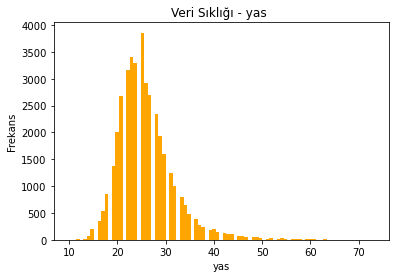

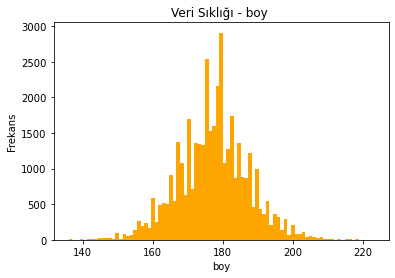

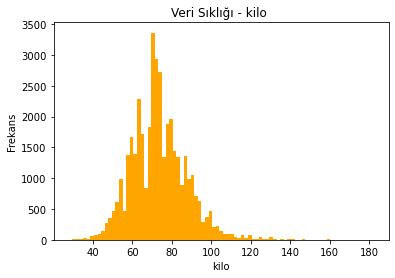

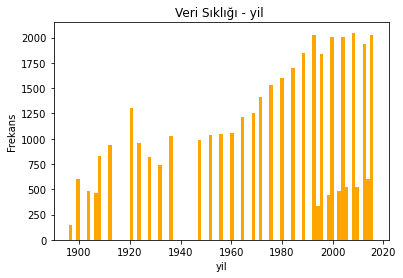

In [17]:
# Tüm sayısal değişkenler için histogramları çizelim.
sayısal_degisken = ["yas", "boy", "kilo", "yil"]
for i in sayısal_degisken:
    plotHistogram(i)

* Beklenildiği gibi yaş, kilo ve boy sütunlarında normal dağılıma yakın bir dağılım söz konusu. (Normal Dağılımın özellikleri istatistik bölümünde daha detaylı ele alınacaktır.)
* Yıl sütununda ise ilk olarak göze çarpan son yüzyılda gerçekleşen sabaş zamanlarında olimpiyatların yapılmadığı ve son 20 yılda olimpiyatların eski yıllara göre daha çok yapıldığıdır.

In [18]:
# veri içerisinde bulunan sayısal değerleri istatistiksel açıdan inceleyelim
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


* Sayısal verinin istatistiksel özellikleri
    1. count: Örnek sayısı
    1. mean: Ortalama
    1. std: Standart sapma
    1. min: Minimum değer
    1. 25%: Birinci çeyrek
    1. 50%: Medyan
    1. 75%: Üçüncü çeyrek
    1. max: Maximum değer

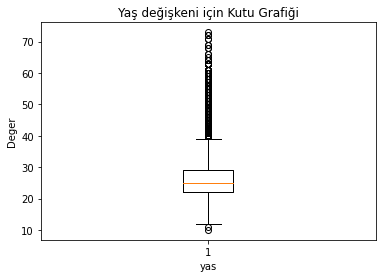

In [19]:
# yas değişkeni için filtreyi uygulayıp sonra kutu grafiği çizdirelim
# aslında kutu grafiği çizdirmenin daha etkili yolları var, bu yolları görselleştirme bölümünde öğreneceğiz
plt.boxplot(veri.yas)
plt.title("Yaş değişkeni için Kutu Grafiği")
plt.xlabel("yas")
plt.ylabel("Deger")
plt.show()

### Kategorik Değişkenler
* Veri içerisinde 9 adet kategorik değişken bulunmaktadır. Bunlar:
    1. isim
    1. cinsiyet
    1. takim
    1. uok
    1. sezon
    1. sehir
    1. spor
    1. etkinlik
    1. madalya
* Kategorik değişkenleri incelemek ve yorumlamak için bar grafiklerini kullanacağız.

In [20]:
# öncelikli olarak bar grafiğini elde edeceğimiz metodumuzu yazalım.
def plotBar(degisken,n = 5):
    """
        Girdi: Değişken/sütun ismi
               n = en önemli 10 eşsiz değer
        Çıktı: Bar grafiği
    """
    veri_ = veri[degisken]
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color = "orange")
    plt.xticks(veri_sayma.index, veri_sayma.index.values)
    plt.xticks(rotation=45)
    plt.ylabel("Frekans")
    plt.title("Veri Sıklığı - {}".format(degisken))
    plt.show()
    print("{}: \n {}".format(degisken, veri_sayma))
    

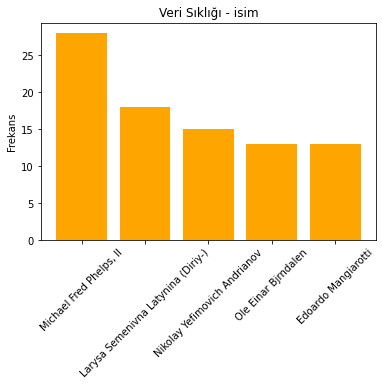

isim: 
 Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: isim, dtype: int64


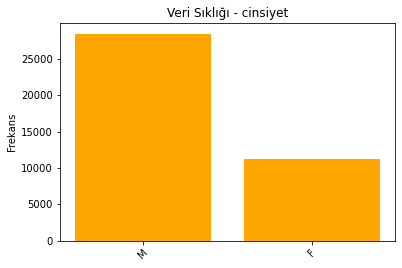

cinsiyet: 
 M    28530
F    11253
Name: cinsiyet, dtype: int64


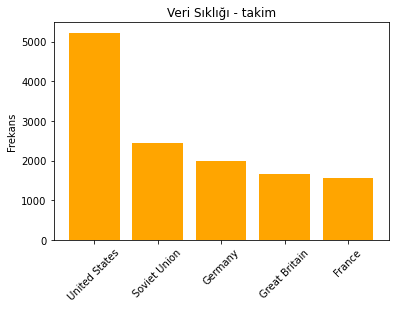

takim: 
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: takim, dtype: int64


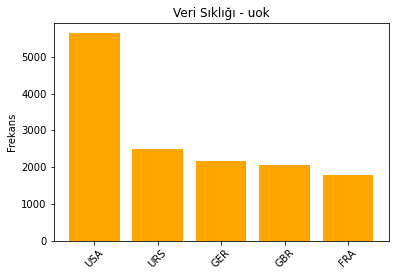

uok: 
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: uok, dtype: int64


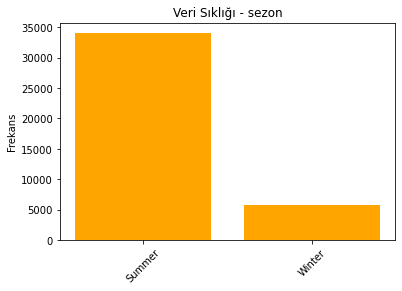

sezon: 
 Summer    34088
Winter     5695
Name: sezon, dtype: int64


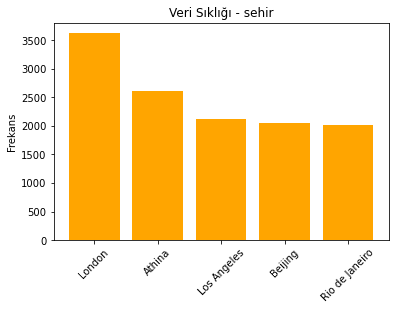

sehir: 
 London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: sehir, dtype: int64


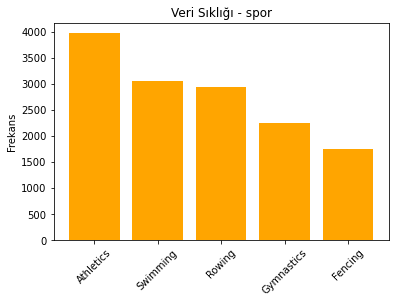

spor: 
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: spor, dtype: int64


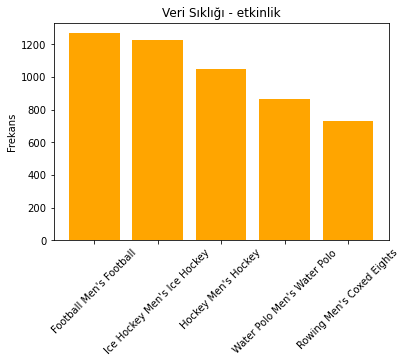

etkinlik: 
 Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: etkinlik, dtype: int64


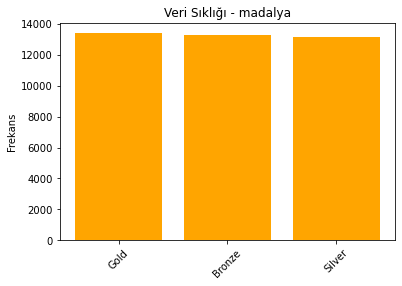

madalya: 
 Gold      13372
Bronze    13295
Silver    13116
Name: madalya, dtype: int64


In [21]:
# sayısal değişkenler için histogram çizdirelim
kategorik_degisken = ["isim", "cinsiyet", "takim", "uok", "sezon", "sehir", "spor", "etkinlik", "madalya"]
for i in kategorik_degisken:
    plotBar(i)

* Olimpiyat tarihi boyunca en çok madalya kazanan isim Micheal Phelps'dir.
* Kadın ve erkek yarışmacılar arasında yaklaşık 1:2 oranı görülmektedir.
* Takımlar olarak en çok ABD katılmıştır.
* Beklendiği gibi uok ve takım çıktıları aynıdır.
* Yaz sezonunda düzenlenen olimpiyat sayısı kış sezonunda düzenlenenden fazladır.
* Olimpiyatlar en çok Londra'da düzenlenmiştir.
* Olimpiyatlarda en çok atletizm branşında yarışılmıştır.
* Erkekler futbol müsabakaları en çok yapılan etkinliktir.
* Verilen madalyaların aynı çıkmasını beklerken, farklılık olduğu görülmektedir.

<a id='4'></a>
## İki Değişkenli Veri Analizi
* İki değişkenli veri analizi yaparken kazanılan madalyalar ve diğer sütunlar arasında bulunan ilişkileri inceleyeceğiz.
    1. Cinsiyete göre boy ve kilo karşılaştırması
    1. Saysal sütunlar arasında ilişkinin incelenmesi
    1. Madalya ve yaş arasındaki ilişkinin incelenmesi
    1. Takımların kazandıkları altın, gümüş ve bronz madalya sayıları
    1. Kazanılan madalyaların hangi şehirlerde kazanıldığı
    1. Cinsiyete göre kazanılan altın, gümüş ve bronz madalya sayıları
* Görselleştirme bölümünde farklı görselleştirme teknikleri kullanılarak veri analizine devam edilecektir.  

### Cinsiyete Göre Boy ve Kilo Karşılaştırması

In [22]:
erkek = veri[veri.cinsiyet == "M"]
erkek.head(1)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold


In [23]:
kadin = veri[veri.cinsiyet == "F"]
kadin.head(1)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.0,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold


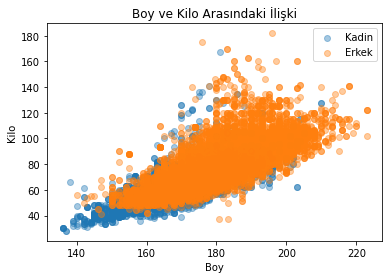

In [24]:
# kadın ve erkek'ler arasında boy ilişkisine bakalım
plt.figure()
plt.scatter(kadin.boy, kadin.kilo, alpha = 0.4, label = "Kadin")
plt.scatter(erkek.boy, erkek.kilo, alpha = 0.4, label = "Erkek")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

* Boy ve kilo arasında pozitif ilişki olduğunu anlıyoruz.

 ### Sayısal Sütunlar Arasında İlişki İncelemesi

In [25]:
# sayisal veriler arasında ilişki incelemesi
veri.loc[:,["yas","boy","kilo"]].corr() # korelasyon tablosu

,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


* Bir önceki grafikte gördüğümüz boy ve kilo arasında pozitif ilişki durumunu, korelasyon tablosunda da görebiliyoruz.

### Madalya ve Yaş Arasındaki İlişki

In [26]:
# altin, gümüş ve bronz olacak şekilde 3 farklı gruba ayıralım.
veri_gecici = veri.copy()
veri_gecici = pd.get_dummies(veri_gecici, columns=['madalya'])
veri_gecici.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0


In [27]:
veri_gecici.loc[:,["yas","madalya_Bronze", "madalya_Gold","madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


### Takımların Kazandıkları Altın, Gümüş ve Bronz Madalya Sayıları


In [28]:
veri_gecici[["takim","madalya_Gold", "madalya_Silver", "madalya_Bronze"]].groupby(["takim"], as_index = False).sum().sort_values(by="madalya_Gold",ascending = False)[:10]

,takim,madalya_Gold,madalya_Silver,madalya_Bronze
462,United States,2474.0,1512.0,1233.0
403,Soviet Union,1058.0,716.0,677.0
165,Germany,679.0,627.0,678.0
215,Italy,535.0,508.0,484.0
171,Great Britain,519.0,582.0,572.0
149,France,455.0,518.0,577.0
420,Sweden,451.0,476.0,507.0
198,Hungary,432.0,330.0,365.0
67,Canada,422.0,413.0,408.0
117,East Germany,369.0,309.0,263.0


### Kazanılan Madalyaların Hangi Şehirlerde Kazanıldığı

In [29]:
veri_gecici[["sehir","madalya_Gold", "madalya_Silver", "madalya_Bronze"]].groupby(["sehir"], as_index = False).sum().sort_values(by="madalya_Gold",ascending = False)[:10]

,sehir,madalya_Gold,madalya_Silver,madalya_Bronze
17,London,1215.0,1195.0,1214.0
3,Athina,883.0,859.0,860.0
18,Los Angeles,726.0,691.0,706.0
6,Beijing,671.0,667.0,710.0
27,Rio de Janeiro,665.0,655.0,703.0
38,Sydney,663.0,661.0,680.0
4,Atlanta,608.0,605.0,629.0
5,Barcelona,559.0,549.0,604.0
33,Seoul,520.0,513.0,549.0
2,Antwerpen,493.0,448.0,367.0


### Cinsiyete Göre Kazanılan Altın, Gümüş ve Bronz Madalya Sayıları

In [30]:
veri_gecici[["cinsiyet","madalya_Gold", "madalya_Silver", "madalya_Bronze"]].groupby(["cinsiyet"], as_index = False).sum().sort_values(by="madalya_Gold",ascending = False)[:10]

,cinsiyet,madalya_Gold,madalya_Silver,madalya_Bronze
1,M,9625.0,9381.0,9524.0
0,F,3747.0,3735.0,3771.0


<a id='5'></a>
## Çok Değişkenli Veri Analizi

### Pivot Tablosu
* Pivot tablo, veritabanı, iş zekası programı ya da veri tablosu gibi, daha geniş bir tabloyu özetleyen istatistik tablosudur. Bu özet, pivot tabloyu anlamlı bir şekilde gruplayan toplamları, ortalamaları veya diğer istatistikleri içerebilir.

In [31]:
veri_pivot = veri.pivot_table(index="madalya", columns = "cinsiyet",
                 values=["boy","kilo","yas"], 
                aggfunc={"boy":np.mean,"kilo":np.mean,"yas":[min, max, np.std]})
veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0   
Gold      170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0   
Silver    170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

* Bu tabloda farklı madalyalar ve cinsiyetler için boy ve kilo parametrelerinin ortalama yaş parametresinin ise maksimum, minimum ve standart sapmasını görebiliyoruz.

<a id='6'></a>
## Anomali Tespiti
* Aykırı değer, diğer gözlemlerden önemli ölçüde farklı bir veri noktasıdır. Bir aykırı değer, ölçümdeki değişkenliğe bağlı olabilir veya deneysel hatayı gösterebilir; ikincisi bazen veri kümesinden çıkarılır. Bir aykırı değer istatistiksel analizlerde ciddi sorunlara neden olabilir.

In [32]:
def anomaliTespiti(df,ozellik):
    outlier_indices = []
    
    for c in ozellik:
        # 1. çeyrek
        Q1 = np.percentile(df[c],25)
        # 3. çeyrek
        Q3 = np.percentile(df[c],75)
        # IQR: Çeyrekler açıklığı
        IQR = Q3 - Q1
        # aykırı tespiti için çarpan
        outlier_step = IQR * 1.5
        # aykırıyı ve aykırı indeksini tespit et
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # indeksleri depola
        outlier_indices.extend(outlier_list_col)
    
    # eşsiz aykırı değerleri bul
    outlier_indices = Counter(outlier_indices)
    # eğer bir örnek (v) 1 farklı sütun için aykırı değerse bunu aykırı olarak kabul et (v>1)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
    
    return multiple_outliers

In [33]:
veri_anomali = veri.loc[anomaliTespiti(veri,["yas","kilo","boy"])]
veri_anomali.spor.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: spor, dtype: int64

* Anamolinin en çok görüldüğü spor branşları yukarıdaki gibidir.

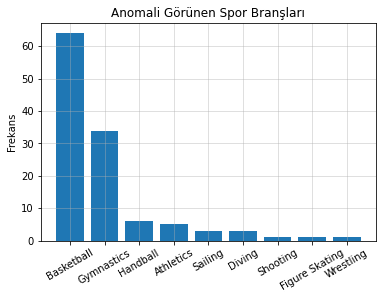

In [34]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index,veri_anomali.spor.value_counts().values)
plt.xticks(rotation = 30)
plt.title("Anomali Görünen Spor Branşları")
plt.ylabel("Frekans")
plt.grid(True,alpha = 0.5)
plt.show()

In [35]:
# Jimnastikte meydana gelen anomali nedeni
veri_gym = veri_anomali[veri_anomali.spor == "Gymnastics"]
veri_gym

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
53759,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
69216,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
69222,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
69225,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
80497,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,Silver


In [36]:
veri_gym.etkinlik.value_counts()

Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: etkinlik, dtype: int64

* Jimnastikte meydana gelen anomali sonucunda veriyi incelediğimizde anomalinin nedeni sporcuların yaşlarının küçük ve kilolarının az olmasından kaynaklıdır.
* Ayrıca jimnastikte meydana gelen anomalilerin hepsi kadın sporcular tarafından gerçekleşmiştir.

In [37]:
# buraya kod yazacağız
veri_basket = veri_anomali[veri_anomali.spor == "Basketball"]
veri_basket

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270119,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Silver
270120,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Gold
270121,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
270740,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


In [38]:
veri_basket.etkinlik.value_counts()

Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: etkinlik, dtype: int64

* Basketbol oynayan erkek oyuncuların boylarının uzun ve kilolarının fazla olmasından kaynaklı anomali tespit edilmiştir. 

<a id='7'></a>
## Zaman Serilerinde Veri Analizi
* Yıllara Göre Ortalama Yaş, Boy ve Kilo Değişimi
* Yıllara Göre Madalya Sayıları

In [39]:
veri_zaman = veri.copy() # verinin orjinali bozulmasın diye kopyalayalım
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [40]:
# olimpiyatların gerçekleştiği eşsiz yılları bulalım
essiz_yillar = veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [41]:
# yılları küçükten büyüğe sıralayalım
dizili_array = np.sort(veri_zaman.yil.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

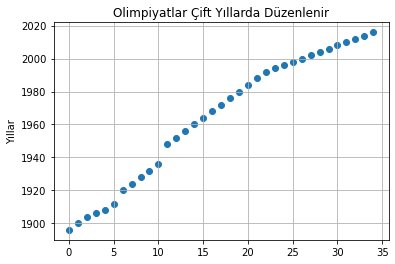

In [42]:
plt.figure()
plt.scatter(range(len(dizili_array)),dizili_array)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar Çift Yıllarda Düzenlenir")
plt.show()

In [43]:
# veri içerisinde bulunan yılları datetime veri tipine dönüştürelim
tarih_saat_nesnesi = pd.to_datetime(veri_zaman['yil'], format='%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: yil, dtype: datetime64[ns]

In [44]:
# veriye tarih saat diye yeni bir sütun açıp, bir önceki satırda elde ettiğimiz datatime veri tipini ekleyelim.
veri_zaman["tarih_saat"] = tarih_saat_nesnesi
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [45]:
# tarih_saat sütununda bulunan datetime veri tipine ait veriyi, asıl verinin indeksi yapalım
# pandas kütüphanesinde indeksi datetime veri tipi olan veri setleri ile çalışmak için özel yapılar bulunmaktadır.
# bu nedenle amacımız olan indeksi datetime veri tipi yapma çalışmamzız gerçekleşmiş oluyor.
veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"],axis = 1,inplace= True)
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


### Yıllara Göre Ortalama Yaş, Boy ve Kilo Değişimi

In [46]:
periyodik_veri = veri_zaman.resample("2A").mean() # 2 yıllık periyotlar halinde ortalama değerleri al
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
1902-12-31,NaN,NaN,NaN
1904-12-31,26.363868,177.241091,74.330823


In [47]:
# kayıp verileri çıkart
periyodik_veri.dropna(axis=0,inplace = True)
periyodik_veri.head()

,yas,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1900-12-31,27.786689,177.882301,74.979950
1904-12-31,26.363868,177.241091,74.330823
1906-12-31,26.479389,176.347576,74.072183
1908-12-31,27.566739,176.662419,73.721107


<Figure size 432x288 with 0 Axes>

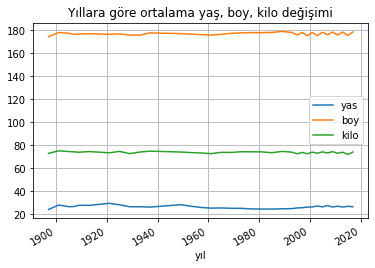

In [48]:
plt.figure()
periyodik_veri.plot()
plt.title("Yıllara göre ortalama yaş, boy, kilo değişimi")
plt.xlabel("yıl")
plt.grid(True)
plt.show()

### Yıllara Göre Madalya Sayıları

In [49]:
veri_zaman = pd.get_dummies(veri_zaman, columns=['madalya'])
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0


In [50]:
periyodik_veri = veri_zaman.resample("2A").sum() # 2 yıllık periyotlar halinde ortalama değerleri al
periyodik_veri.head()
# kayıp verileri çıkart
periyodik_veri = periyodik_veri[~(periyodik_veri == 0).any(axis=1)]
periyodik_veri.tail()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
2008-12-31,53344.0,365157.91,152090.92,710.0,671.0,667.0
2010-12-31,13896.0,91395.00,37877.12,171.0,174.0,175.0
2012-12-31,50595.0,346091.47,143102.94,679.0,632.0,630.0
2014-12-31,15907.0,104686.00,42838.63,198.0,202.0,197.0
2016-12-31,53256.0,360846.03,149628.71,703.0,665.0,655.0


<Figure size 432x288 with 0 Axes>

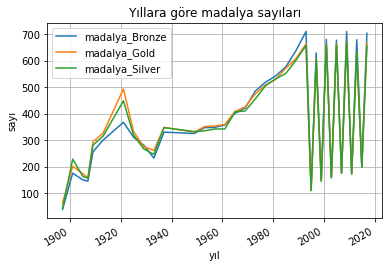

In [51]:
plt.figure()
periyodik_veri.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara göre madalya sayıları")
plt.ylabel("sayı")
plt.xlabel("yıl")
plt.grid(True)
plt.show()

* Yukarıdaki şekilde görüldüğü gibi 2000'li yıllardan sonra madalya sayılarındaki dalgalanmalar fazla oluyor. Bunun nedeni yaz ve kış olimpiyatlarında yapılan etkinlik sayısının ve buna karşılık gelen madalya sayısının farklılık göstermesidir.

### Yıllara ve Sezonlara Göre Madalya Sayıları

In [52]:
# veriyi yaz ve kış olmak üzere 2 ye ayıralım
yaz = veri_zaman[veri_zaman.sezon == "Summer"]
kis = veri_zaman[veri_zaman.sezon == "Winter"]
kis.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,0,1,0
1992-01-01,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1,0,0


In [53]:
# kış için
periyodik_veri_kis = kis.resample("A").sum() # 2 yıllık periyotlar halinde ortalama değerleri al

# kayıp verileri çıkart
periyodik_veri_kis = periyodik_veri_kis[~(periyodik_veri_kis == 0).any(axis=1)]
periyodik_veri_kis.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1924-12-31,3919.60,22867.28,9703.58,37,55,38
1928-12-31,2265.56,15745.75,6862.50,31,30,28
1932-12-31,2431.00,16357.71,7067.76,28,32,32
1936-12-31,2742.00,19123.20,8101.88,35,36,37
1948-12-31,3643.00,23942.51,10375.92,46,41,48


In [54]:
# yaz için
periyodik_veri_yaz = yaz.resample("A").sum() # 2 yıllık periyotlar halinde ortalama değerleri al

# kayıp verileri çıkart
periyodik_veri_yaz = periyodik_veri_yaz[~(periyodik_veri_yaz == 0).any(axis=1)]
periyodik_veri_yaz.head()

,yas,boy,kilo,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,
1896-12-31,3418.52,24922.09,10400.97,38.0,62.0,43.0
1900-12-31,16783.16,107440.91,45287.89,175.0,201.0,228.0
1904-12-31,12812.84,86139.17,36124.78,150.0,173.0,163.0
1906-12-31,12127.56,80767.19,33925.06,145.0,157.0,156.0
1908-12-31,22907.96,146806.47,61262.24,256.0,294.0,281.0


<Figure size 432x288 with 0 Axes>

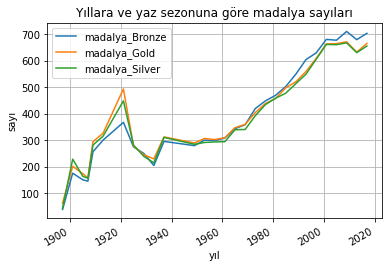

<Figure size 432x288 with 0 Axes>

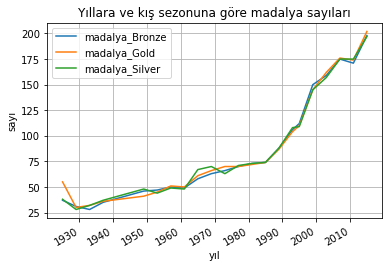

In [55]:
plt.figure()
periyodik_veri_yaz.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara ve yaz sezonuna göre madalya sayıları")
plt.ylabel("sayı")
plt.xlabel("yıl")
plt.grid(True)
plt.show()

plt.figure()
periyodik_veri_kis.loc[:,["madalya_Bronze", "madalya_Gold", "madalya_Silver"]].plot()
plt.title("Yıllara ve kış sezonuna göre madalya sayıları")
plt.ylabel("sayı")
plt.xlabel("yıl")
plt.grid(True)
plt.show()